# **TASK 1-IRIS FLOWER CLASSIFICATION**


### ***By intern SREEVISWANATH.J***

**Import Libraries for Data Manipulation and Visualization**

In [ ]:
import pandas as pd
import numpy as np

**Load the Dataset**

In [ ]:
# Dataset-specific Library
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


**Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


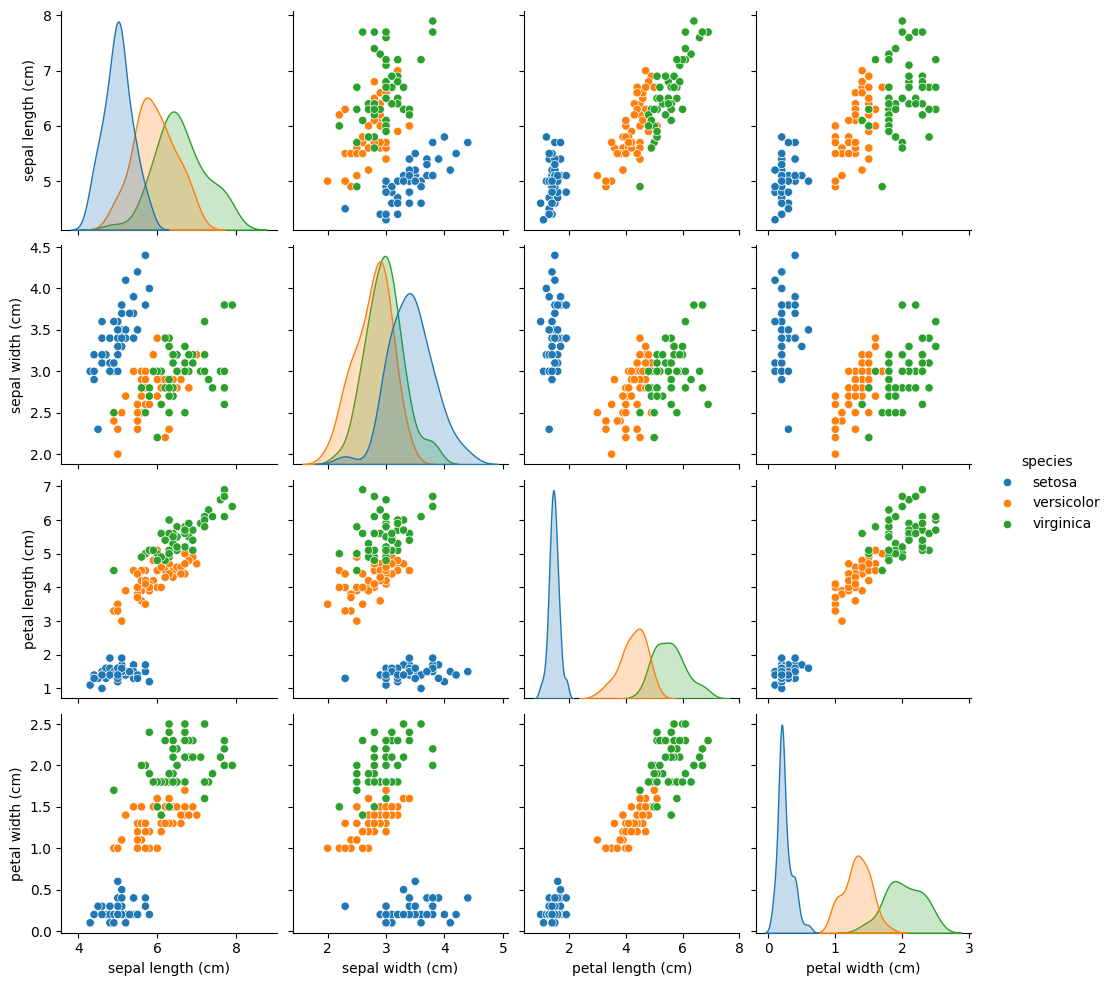

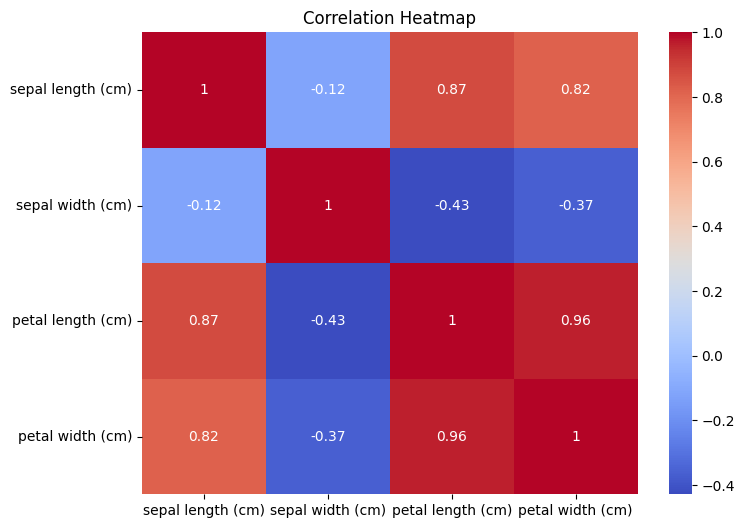

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot Visualization
sns.pairplot(df, hue='species')
plt.show()

# Drop the string species column for heatmap (as correlation requires numeric values)
# The original code only dropped 'species_str', but 'species' still contains strings.
numeric_df = df.drop(columns=['species']) # Drop both string columns

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Species'] = le.fit_transform(df['species'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print(label_mapping)

{'setosa': 0, 'versicolor': 1, 'virginica': 2}


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [ ]:
#splitting the data
X=df.iloc[:,:4].values    # all the features except the species
Y=df.iloc[:,-1].values    # only the target variable species
print("X=",X)
print("\nY=",Y)

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2)

X= [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(max_iter=1000)

lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print("Classification analysis\n")
print(classification_report(y_pred,y_test))

print("Confusion Matrix\n")
print(confusion_matrix(y_pred,y_test))

print("\nAccuracy of the model\n")
print(round(accuracy_score(y_pred,y_test),5))


Classification analysis

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Confusion Matrix

[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]

Accuracy of the model

0.93333


**Decision Tree**

Decision Tree Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      1.00      0.88         7
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



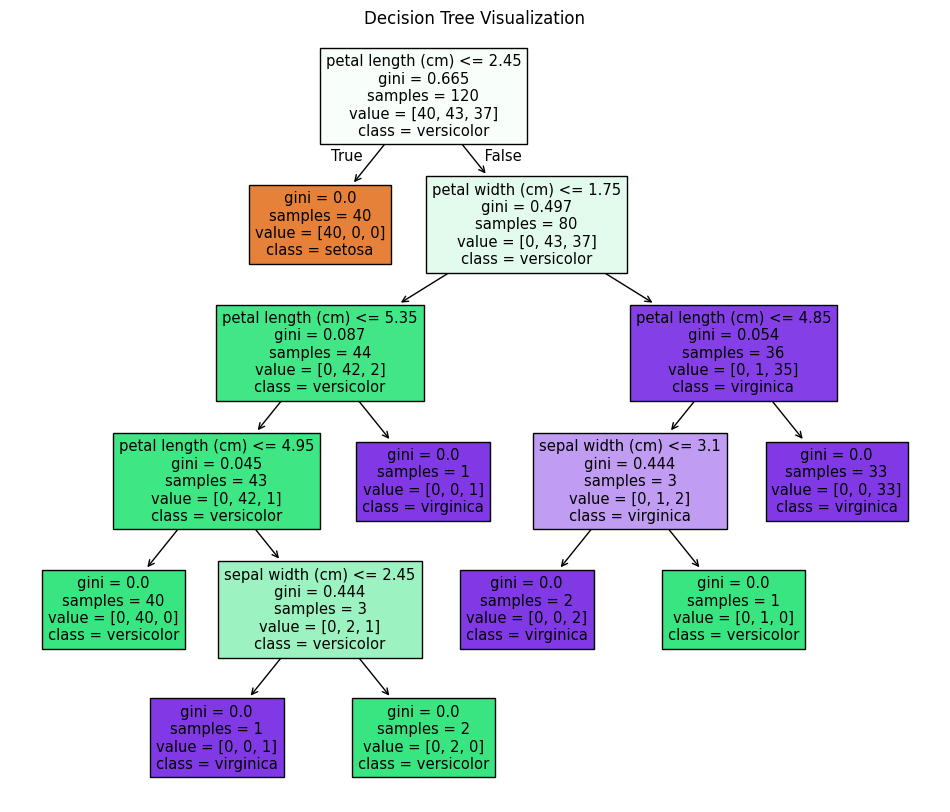

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(x_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# Visualize the Decision Tree
plt.figure(figsize=(12, 10))
plot_tree(tree_model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

**Comparative Visualization**

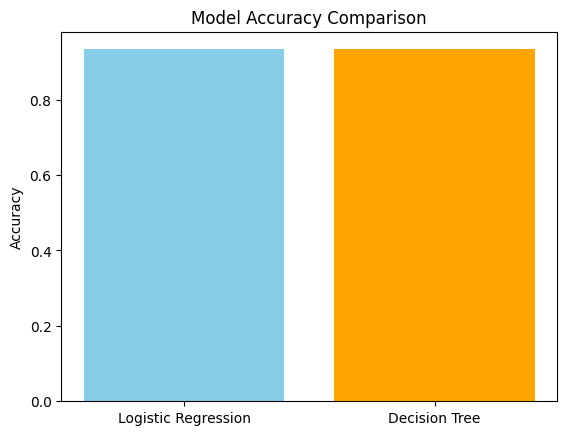

In [ ]:
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred)]

plt.bar(models, accuracies, color=['skyblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()